# Cleaning Experiment

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Import the data from the summary csv file called "cleaningExptBeth_summary.csv"
#data = pd.read_csv('../../LabData/cleaningExptBeth.csv')

#import the raw data from the csv file called "cleaningExptBeth.csv"
data = pd.read_csv('../../LabData/cleaningExptBeth.csv')

In [5]:
data.head()

,Count,MeanCountPerMl,CleaningType,TimeAfterCleaning,Replicate
0,6,120.0,Alcohol,0,R1
1,34,680.0,Alcohol,0,R2
2,221,7370.0,Alcohol,0,R3
3,36,720.0,Alcohol,0,R4
4,0,0.0,Alcohol,0,R5


# Plot the data

<AxesSubplot:xlabel='TimeAfterCleaning', ylabel='Count'>

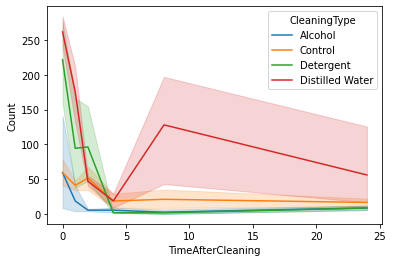

In [8]:
# plot the data with time on the x-axis and the number of bacteria on the y-axis. Group by the cleaning method. Include error bars.
sns.lineplot(x='TimeAfterCleaning', y='Count', hue='CleaningType', data=data)



# Set up the time-series model

In [9]:
# Fit the mixed-effects model to the raw data
raw_model = smf.mixedlm("Count ~ C(CleaningType) * C(TimeAfterCleaning)", data, groups=data["CleaningType"])
raw_result = raw_model.fit()

# Print the results
print(raw_result.summary())


                                       Mixed Linear Model Regression Results
Model:                                 MixedLM                     Dependent Variable:                     Count    
No. Observations:                      120                         Method:                                 REML     
No. Groups:                            4                           Scale:                                  2325.0155
Min. group size:                       26                          Log-Likelihood:                         -527.1861
Max. group size:                       32                          Converged:                              Yes      
Mean group size:                       30.0                                                                         
--------------------------------------------------------------------------------------------------------------------
                                                               Coef.      Std.Err.      z    P>|z|  [0.0

# Plot the results 

Residual summary statistics:
Mean: -0.00
Std: 43.31
Min: -115.50
Max: 161.60


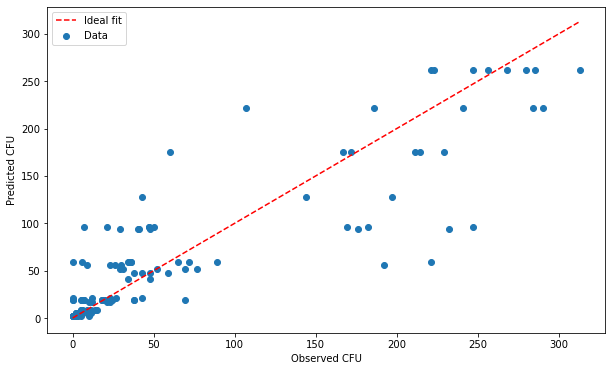

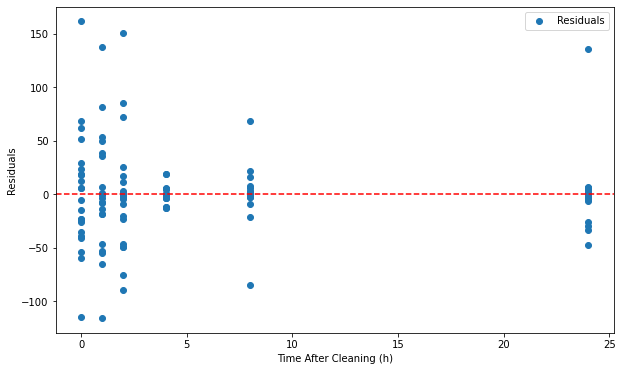

In [13]:
import matplotlib.pyplot as plt

# Add predictions to the raw data DataFrame
data["Predicted_CFU"] = raw_result.fittedvalues

# Calculate the residuals (differences between observed and predicted values)
data["Residual"] = data["Count"] - data["Predicted_CFU"]

# Calculate summary statistics of residuals
mean_residual = data["Residual"].mean()
std_residual = data["Residual"].std()
min_residual = data["Residual"].min()
max_residual = data["Residual"].max()

summary_stats = f"Mean: {mean_residual:.2f}\nStd: {std_residual:.2f}\nMin: {min_residual:.2f}\nMax: {max_residual:.2f}"
print("Residual summary statistics:")
print(summary_stats)

# Plot observed vs. predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data["Count"], data["Predicted_CFU"], label="Data")
ax.plot([data["Count"].min(), data["Count"].max()], [data["Count"].min(), data["Count"].max()],
        linestyle='--', color='red', label="Ideal fit")

ax.set_xlabel("Observed CFU")
ax.set_ylabel("Predicted CFU")
ax.legend()
plt.show()

# Plot residuals over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data["TimeAfterCleaning"], data["Residual"], label="Residuals")
ax.axhline(y=0, linestyle='--', color='red')

ax.set_xlabel("Time After Cleaning (h)")
ax.set_ylabel("Residuals")
ax.legend()
plt.show()


# plot the time-sries prediction

In [ ]:
# plot the time-series predictions of Count for each cleaning method using the raw_model which was fit to the raw data

# create a new dataframe with all possible combinations of CleaningType and TimeAfterCleaning
# this is done by creating a dataframe with all possible CleaningType values and a dataframe with all possible TimeAfterCleaning values
# and then merging the two dataframes together
